# Welcome to the notebook for Hong Kong JobsDb job advertisement analysis


## import module and data

In [1]:
# scrap the data

# run hkjobsdb_scrap.py outside of this notebook
# returns <job title-date of scrap-number>.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from geopy.geocoders import Nominatim
from geopandas import gpd
import pandas as pd
import folium
sns.set_theme()

In [3]:
# important parameters
file_name = ('data-scientist-2022-12-06-1.csv')

In [4]:
# load the dat
df_raw = pd.read_csv(file_name)


## Data inspection 

In [5]:
df_raw.head(5)

,title,salary,company,posted,district,job_description,Career Level,Years of Experience,Company Website,Qualification,Job Type,Job Functions,url
0,Data Scientist,salary,Connexe Search Limited,2022-12-06,Kowloon Bay,Our client is one of the leading financial ins...,NaN,NaN,NaN,NaN,Contract,"Banking / Finance, Others, Information Technol...",https://hk.jobsdb.com/hk/en/job/data-scientist...
1,Data Analyst (Data & AI),salary,NCSI (HK) Limited,2022-12-06,Tai Koo,Key Role Responsibilities:\n\nParticipate in c...,NaN,NaN,http://www.ncs-i.com,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
2,Data Analyst (Data Governance),salary,Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Duties:\nManage & support data governance mode...,Middle,3 years,NaN,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
3,Solution Analyst - ICC - Data Integration,salary,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,Reports to: Solution Lead / Senior Solution Le...,NaN,NaN,http://www.cathaypacific.com/careers,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",https://hk.jobsdb.com/hk/en/job/solution-analy...
4,Analyst Programmer (Data Analytics),salary,China State Construction Engineering (Hong Kon...,2022-12-06,district,Job Description:\nEstablish and maintain high-...,Entry Level,3 years,https://www.cscechk.com/en/,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",https://hk.jobsdb.com/hk/en/job/analyst-progra...


In [6]:
# function to replace custom missing value placeholder to NaN values
def replace_with_nan(col, target_to_be_replaced):
    try:
        col.replace(target_to_be_replaced, np.nan, inplace=True)
    except:
        print('replacement with nan failed')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                349 non-null    object
 1   salary               349 non-null    object
 2   company              349 non-null    object
 3   posted               349 non-null    object
 4   district             345 non-null    object
 5   job_description      349 non-null    object
 6   Career Level         264 non-null    object
 7   Years of Experience  233 non-null    object
 8   Company Website      214 non-null    object
 9   Qualification        281 non-null    object
 10  Job Type             349 non-null    object
 11  Job Functions        349 non-null    object
 12  url                  349 non-null    object
dtypes: object(13)
memory usage: 35.6+ KB


In [8]:
df_raw.describe()

,title,salary,company,posted,district,job_description,Career Level,Years of Experience,Company Website,Qualification,Job Type,Job Functions,url
count,349,349,349,349,345,349,264,233,214,281,349,349,349
unique,255,15,178,29,39,290,3,12,96,5,11,124,316
top,Data Analyst,salary,Manpower Services (Hong Kong) Limited,2022-12-02,district,Our client is a multinational bank with an all...,Middle,3 years,http://www.manpowergroupgrc.hk,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",https://hk.jobsdb.com/hk/en/job/data-analyst-f...
freq,17,323,19,30,88,5,153,82,20,240,205,43,2


* missing values in district, career level, years of experience, company website and qualitification 
* some of the missing info in qualification is found in job_description
* there might be duplicate jobs ads

* next: remove duplicates (data cleaning) and inspect each column

## Data Cleaning

In [9]:
df_clean_1= df_raw.copy()

In [10]:
# drop duplicates
df_clean_1.drop_duplicates(inplace=True)
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 348
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                316 non-null    object
 1   salary               316 non-null    object
 2   company              316 non-null    object
 3   posted               316 non-null    object
 4   district             312 non-null    object
 5   job_description      316 non-null    object
 6   Career Level         238 non-null    object
 7   Years of Experience  208 non-null    object
 8   Company Website      194 non-null    object
 9   Qualification        254 non-null    object
 10  Job Type             316 non-null    object
 11  Job Functions        316 non-null    object
 12  url                  316 non-null    object
dtypes: object(13)
memory usage: 34.6+ KB


In [11]:
# convert all strings to lowercase 
# df_clean_1['title']= df_clean_1["title"].str.lower()

In [12]:
df_clean_1[df_clean_1["title"].str.contains("analyst",case=False)].head()

,title,salary,company,posted,district,job_description,Career Level,Years of Experience,Company Website,Qualification,Job Type,Job Functions,url
1,Data Analyst (Data & AI),salary,NCSI (HK) Limited,2022-12-06,Tai Koo,Key Role Responsibilities:\n\nParticipate in c...,NaN,NaN,http://www.ncs-i.com,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
2,Data Analyst (Data Governance),salary,Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Duties:\nManage & support data governance mode...,Middle,3 years,NaN,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
3,Solution Analyst - ICC - Data Integration,salary,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,Reports to: Solution Lead / Senior Solution Le...,NaN,NaN,http://www.cathaypacific.com/careers,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",https://hk.jobsdb.com/hk/en/job/solution-analy...
4,Analyst Programmer (Data Analytics),salary,China State Construction Engineering (Hong Kon...,2022-12-06,district,Job Description:\nEstablish and maintain high-...,Entry Level,3 years,https://www.cscechk.com/en/,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",https://hk.jobsdb.com/hk/en/job/analyst-progra...
5,Business Intelligence Analyst,salary,Bureau Veritas Hong Kong Limited,2022-12-06,Kowloon Bay,Responsibilities:\nBuild dashboards to suppor...,Middle,5 years,NaN,Degree,"Full Time, Permanent","Professional Services, Business Analysis / Dat...",https://hk.jobsdb.com/hk/en/job/business-intel...


In [13]:
len(df_clean_1[df_clean_1["title"].str.contains("analyst",case=False)])

135

In [14]:
df_clean_1.columns = df_clean_1.columns.str.lower()
df_clean_1.columns

Index(['title', 'salary', 'company', 'posted', 'district', 'job_description',
       'career level', 'years of experience', 'company website',
       'qualification', 'job type', 'job functions', 'url'],
      dtype='object')

In [15]:
# rearrange the columns for easier reading
df_clean_1 = df_clean_1[['title',
                          'salary',
                          'company',
                          'posted',
                          'district',
                          'career level',
                          'years of experience',
                          'qualification',
                          'job type',
                          'job functions',
                          'job_description',
                          'url']
                        ]

In [16]:
df_clean_1.columns

Index(['title', 'salary', 'company', 'posted', 'district', 'career level',
       'years of experience', 'qualification', 'job type', 'job functions',
       'job_description', 'url'],
      dtype='object')

In [17]:
# inspect career level
df_clean_1['career level'].unique()

array([nan, 'Middle', 'Entry Level', 'Senior'], dtype=object)

In [18]:
df_clean_1['career level'].value_counts()

Middle         137
Entry Level     70
Senior          31
Name: career level, dtype: int64

In [19]:
# inspect salary
df_clean_1['salary'].unique()
# very few ads are transparent with salary

array(['salary', 'HK$30,000 - HK$45,000 /month',
       'HK$70,000 - HK$90,000 /month', 'HK$30,000 - HK$70,000 /month',
       'HK$25,000 - HK$70,000 /month', 'HK$30,000 - HK$55,000 /month',
       'HK$20,000 - HK$55,000 /month', 'HK$30,000 - HK$35,000 /month',
       'HK$25,000 - HK$55,000 /month', 'HK$25,000 - HK$30,000 /month',
       'HK$20,000 - HK$30,000 /month', 'HK$35,000 - HK$55,000 /month',
       'HK$25,000 - HK$35,000 /month', 'HK$14,000 - HK$20,000 /month',
       'HK$25,000 - HK$45,000 /month'], dtype=object)

In [20]:
# [completed] next: feature extraction to extract the min, max and average salary
# [completed][n00] next: after feature extraction, replace 'salary' to NaN

In [21]:
# inspect district
df_clean_1['district'].unique()

array(['Kowloon Bay', 'Tai Koo', 'Ngau Tau Kok', 'Lantau Island',
       'district', 'Sheung Wan', 'Shatin Area', 'Tung Chung', 'Aberdeen',
       'Tseung Kwan O', 'Chai Wan', 'Central', 'Central & Western Area',
       nan, 'Quarry Bay', 'Wan Chai', 'Admiralty', 'Kwai Hing',
       'Overseas', 'Airport Area', 'Southern Area', 'Tsim Sha Tsui',
       'Kwun Tong', 'Tsing Yi', 'Tai Po Area', 'Others', 'North Point',
       'Hung Hom', 'Kwun Tong Area', 'Causeway Bay', 'Kwai Tsing Area',
       'Lai Chi Kok', 'Yau Tsim Mong Area', 'Cheung Sha Wan',
       'Wong Tai Sin Area', 'Sai Wan Ho', 'Tin Hau', 'Tsuen Wan Area',
       'Shau Kei Wan', 'Mong Kok'], dtype=object)

In [22]:
replace_with_nan(df_clean_1['district'], 'district')
len(df_clean_1['district'].unique())

39

In [23]:
df_clean_1['district'].value_counts()

Shatin Area               23
Central & Western Area    23
Kowloon Bay               22
Central                   19
Kwun Tong                 17
Quarry Bay                13
Wan Chai                  12
Ngau Tau Kok              10
Tai Po Area                8
Tsing Yi                   6
Aberdeen                   6
Admiralty                  5
Others                     5
Airport Area               5
Tsim Sha Tsui              5
Kwun Tong Area             4
Southern Area              4
Cheung Sha Wan             4
North Point                4
Lantau Island              3
Wong Tai Sin Area          3
Hung Hom                   3
Kwai Hing                  3
Sheung Wan                 3
Tai Koo                    3
Tseung Kwan O              2
Causeway Bay               2
Lai Chi Kok                2
Tung Chung                 1
Overseas                   1
Kwai Tsing Area            1
Yau Tsim Mong Area         1
Chai Wan                   1
Sai Wan Ho                 1
Tin Hau       

In [24]:
# next on district: study the distribution of job locations

In [25]:
# inspect years of experience
df_clean_1['years of experience'].unique()

array([nan, '3 years', '5 years', '2 years', '1 year', '8 years',
       '15 years', '7 years', '4 years', '6 years', '10 years',
       '12 years', '9 years'], dtype=object)

In [26]:
df_clean_1['years of experience'].value_counts()

3 years     70
2 years     37
5 years     32
1 year      22
4 years     14
8 years     12
6 years      9
7 years      4
10 years     4
15 years     2
12 years     1
9 years      1
Name: years of experience, dtype: int64

In [27]:
# [completed] next: extract numerical values from years of experience 

In [28]:
# inspect qualification
df_clean_1['qualification'].unique()

array([nan, 'Degree', 'Non-Degree Tertiary', 'Postgraduate', '(N/A)',
       'Matriculated'], dtype=object)

In [29]:
# convert [N/A] to nan
replace_with_nan(df_clean_1['qualification'],'(N/A)')
df_clean_1['qualification'].unique()

array([nan, 'Degree', 'Non-Degree Tertiary', 'Postgraduate',
       'Matriculated'], dtype=object)

In [30]:
df_clean_1['qualification'].value_counts()

Degree                 217
Non-Degree Tertiary     21
Postgraduate             5
Matriculated             1
Name: qualification, dtype: int64

## Feature Extraction

In [31]:
df_clean_2  = df_clean_1.copy()

In [32]:
# extract min and max salary
df_clean_2 ["salary"]=df_clean_2 ["salary"].apply(lambda x: x.replace("HK$",""))
df_clean_2 ["salary"]=df_clean_2 ["salary"].apply(lambda x: x.replace(",",""))
df_clean_2 ["salary"]=df_clean_2 ["salary"].apply(lambda x: str(re.search('(\d+)((\s)(-)(\s)(\d+))?',x).group()) if "/" in x else x)
df_clean_2['salary'].unique()

array(['salary', '30000 - 45000', '70000 - 90000', '30000 - 70000',
       '25000 - 70000', '30000 - 55000', '20000 - 55000', '30000 - 35000',
       '25000 - 55000', '25000 - 30000', '20000 - 30000', '35000 - 55000',
       '25000 - 35000', '14000 - 20000', '25000 - 45000'], dtype=object)

In [33]:
t = '10000 - 25000'
t.split(' - ')

['10000', '25000']

In [34]:
def extract_salary_min_max(df):
    min_s_list = []
    max_s_list = []
    avg_s_list = []
    for i in df['salary']:
        if 'salary' not in i:
            min_s = int(i.split(' - ')[0])
            max_s = int(i.split(' - ')[1])
            avg_s = (min_s + max_s)//2
        else:
            min_s = 'salary'
            max_s = 'salary'
            avg_s = 'salary'
        min_s_list.append(min_s)
        max_s_list.append(max_s)
        avg_s_list.append(avg_s)
    
    return [min_s_list, max_s_list, avg_s_list]

In [35]:
df_clean_2['min_salary'] = extract_salary_min_max(df_clean_2)[0]
df_clean_2['max_salary'] = extract_salary_min_max(df_clean_2)[1]
df_clean_2['avg_salary'] = extract_salary_min_max(df_clean_2)[2]

df_clean_2.drop(['salary'], axis=1, inplace = True)
df_clean_2.head()


,title,company,posted,district,career level,years of experience,qualification,job type,job functions,job_description,url,min_salary,max_salary,avg_salary
0,Data Scientist,Connexe Search Limited,2022-12-06,Kowloon Bay,NaN,NaN,NaN,Contract,"Banking / Finance, Others, Information Technol...",Our client is one of the leading financial ins...,https://hk.jobsdb.com/hk/en/job/data-scientist...,salary,salary,salary
1,Data Analyst (Data & AI),NCSI (HK) Limited,2022-12-06,Tai Koo,NaN,NaN,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",Key Role Responsibilities:\n\nParticipate in c...,https://hk.jobsdb.com/hk/en/job/data-analyst-d...,salary,salary,salary
2,Data Analyst (Data Governance),Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Middle,3 years,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",Duties:\nManage & support data governance mode...,https://hk.jobsdb.com/hk/en/job/data-analyst-d...,salary,salary,salary
3,Solution Analyst - ICC - Data Integration,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,NaN,NaN,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",Reports to: Solution Lead / Senior Solution Le...,https://hk.jobsdb.com/hk/en/job/solution-analy...,salary,salary,salary
4,Analyst Programmer (Data Analytics),China State Construction Engineering (Hong Kon...,2022-12-06,NaN,Entry Level,3 years,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",Job Description:\nEstablish and maintain high-...,https://hk.jobsdb.com/hk/en/job/analyst-progra...,salary,salary,salary


In [36]:
# [n00] replace 'salary' to nan
replace_with_nan(df_clean_2['min_salary'], 'salary')
replace_with_nan(df_clean_2['max_salary'], 'salary')
replace_with_nan(df_clean_2['avg_salary'], 'salary')
df_clean_2.head()

,title,company,posted,district,career level,years of experience,qualification,job type,job functions,job_description,url,min_salary,max_salary,avg_salary
0,Data Scientist,Connexe Search Limited,2022-12-06,Kowloon Bay,NaN,NaN,NaN,Contract,"Banking / Finance, Others, Information Technol...",Our client is one of the leading financial ins...,https://hk.jobsdb.com/hk/en/job/data-scientist...,NaN,NaN,NaN
1,Data Analyst (Data & AI),NCSI (HK) Limited,2022-12-06,Tai Koo,NaN,NaN,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",Key Role Responsibilities:\n\nParticipate in c...,https://hk.jobsdb.com/hk/en/job/data-analyst-d...,NaN,NaN,NaN
2,Data Analyst (Data Governance),Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Middle,3 years,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",Duties:\nManage & support data governance mode...,https://hk.jobsdb.com/hk/en/job/data-analyst-d...,NaN,NaN,NaN
3,Solution Analyst - ICC - Data Integration,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,NaN,NaN,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",Reports to: Solution Lead / Senior Solution Le...,https://hk.jobsdb.com/hk/en/job/solution-analy...,NaN,NaN,NaN
4,Analyst Programmer (Data Analytics),China State Construction Engineering (Hong Kon...,2022-12-06,NaN,Entry Level,3 years,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",Job Description:\nEstablish and maintain high-...,https://hk.jobsdb.com/hk/en/job/analyst-progra...,NaN,NaN,NaN


In [37]:
# generate cateogical labels for job titles

generic_job_titles = ['analyst programmer',
                      'business analyst',
                      'business intelligence analyst',
                      'data analyst', 
                      'data engineer',
                      'data scientist',
                      'devops',
                      'machine learning',
                      'mlops',
                      'programmer',
                      'quantitative researcher',
                       ]


## Exploratory Data Analysis

In [38]:
df_clean_3 = df_clean_2.copy()

### Job Titles breakdown

In [39]:
def count_title_by_job_nature(df, generic_titles):
    count_by_generic = []
    count = 0
    for title in generic_titles: 
        count = len(df[df['title'].str.contains(title, case=False)])
        count_by_generic.append(count)
    return count_by_generic

In [40]:
count_by_generic_titles = count_title_by_job_nature(df_clean_3, generic_job_titles)


Since some job titles on the advertisment contains multiple titles, title match was implemented in a way that allows multiple matches too. The pie chart represents the portion of title matchs among all generic titles, instead of all job ads

In [41]:
df_title = pd.DataFrame({'Generic Title':generic_job_titles, 'Count':count_by_generic_titles})
df_title.sort_values(by='Count',ascending= False, inplace=True)
df_title

,Generic Title,Count
3,data analyst,84
4,data engineer,35
5,data scientist,18
9,programmer,16
1,business analyst,13
0,analyst programmer,8
7,machine learning,7
2,business intelligence analyst,4
10,quantitative researcher,3
6,devops,1


In [42]:
# filter
df_pie_title = df_title[df_title['Count']>5]
other_row = pd.Series({'Generic Title':'Others', 'Count' : 5})
df_pie_title= pd.concat([df_pie_title, other_row.to_frame().T], ignore_index = True)
# this line copied from pandas docs 

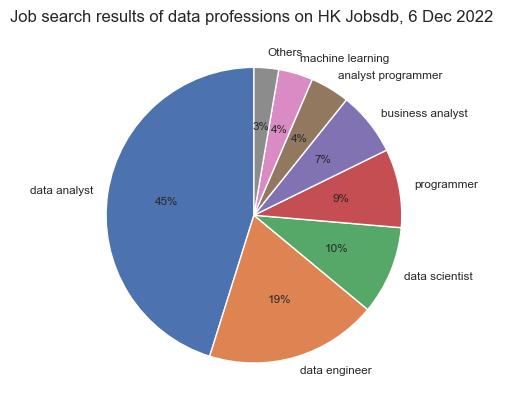

In [43]:
ax = df_pie_title.plot(y='Count', 
                        kind='pie', 
                        labels= df_pie_title['Generic Title'], 
                        autopct = '%1.0f%%',
                        legend=False,
                        title='Job search results of data professions on HK Jobsdb, 6 Dec 2022 ',
                        startangle=90,
                         fontsize = 8.5
                      )   
ax.set(ylabel='')
ax.figure.savefig('job_titles.svg')
ax.figure.savefig('job_titles.png')


### Career level, yeo, qualification

In [44]:
# convert no of years (strings) to no of years (int)

df_clean_3['years of experience'] = df_clean_3['years of experience'].str.extract('(\d+)')
df_clean_3.head()

,title,company,posted,district,career level,years of experience,qualification,job type,job functions,job_description,url,min_salary,max_salary,avg_salary
0,Data Scientist,Connexe Search Limited,2022-12-06,Kowloon Bay,NaN,NaN,NaN,Contract,"Banking / Finance, Others, Information Technol...",Our client is one of the leading financial ins...,https://hk.jobsdb.com/hk/en/job/data-scientist...,NaN,NaN,NaN
1,Data Analyst (Data & AI),NCSI (HK) Limited,2022-12-06,Tai Koo,NaN,NaN,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",Key Role Responsibilities:\n\nParticipate in c...,https://hk.jobsdb.com/hk/en/job/data-analyst-d...,NaN,NaN,NaN
2,Data Analyst (Data Governance),Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Middle,3,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",Duties:\nManage & support data governance mode...,https://hk.jobsdb.com/hk/en/job/data-analyst-d...,NaN,NaN,NaN
3,Solution Analyst - ICC - Data Integration,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,NaN,NaN,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",Reports to: Solution Lead / Senior Solution Le...,https://hk.jobsdb.com/hk/en/job/solution-analy...,NaN,NaN,NaN
4,Analyst Programmer (Data Analytics),China State Construction Engineering (Hong Kon...,2022-12-06,NaN,Entry Level,3,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",Job Description:\nEstablish and maintain high-...,https://hk.jobsdb.com/hk/en/job/analyst-progra...,NaN,NaN,NaN


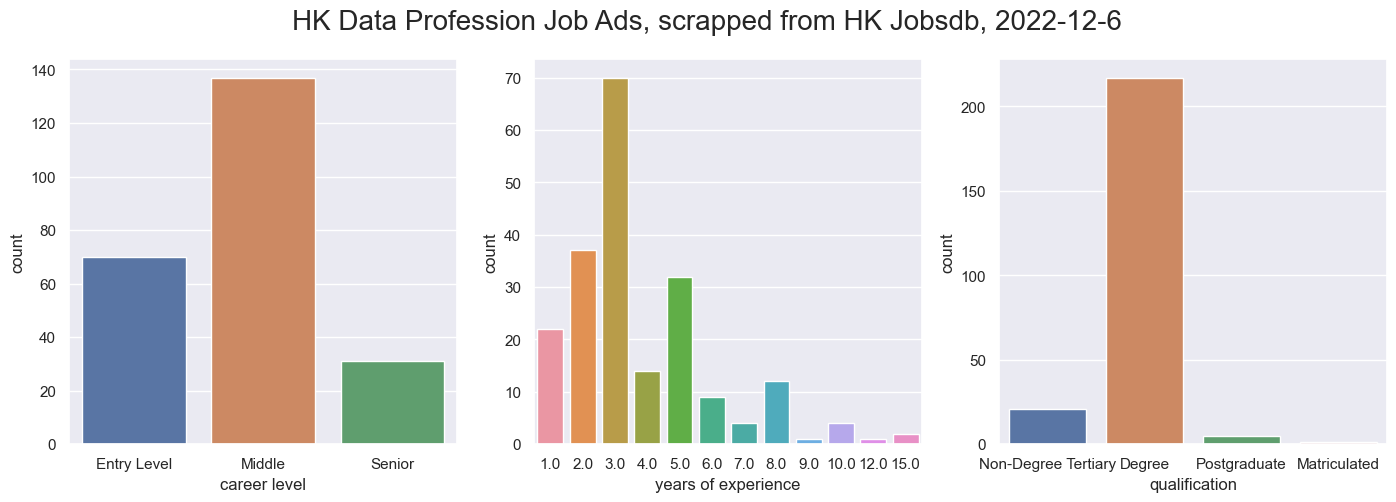

In [45]:
# career level, years of experience, qualification breakdown
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
df_p1 = df_clean_3.copy()

fig.suptitle('HK Data Profession Job Ads, scrapped from HK Jobsdb, 2022-12-6',size=20)

career_level_order = ['Entry Level', 'Middle', 'Senior']
plot_career_level = sns.countplot(x='career level',data=df_p1, ax = axes[0], order = career_level_order)

df_p1['years of experience'] = pd.to_numeric(df_p1['years of experience'], downcast = 'integer')
df_p1.sort_values(by=['years of experience'],inplace=True)
plot_yoe = sns.countplot(x='years of experience',data=df_p1, ax = axes[1])

plot_quali = sns.countplot(x='qualification',data=df_p1, ax = axes[2])

fig.savefig('additional_info_breakdown.svg')
fig.figure.savefig('additional_info_breakdown.png')


### map

In [50]:
geolocator = Nominatim(user_agent="Your_Name")

In [51]:
df_map = df_raw.copy()

In [52]:
to_drop = ['Overseas',
           'Others',
           'Southern Area']

for i in to_drop:
    df_map['district'].replace(i,np.nan,inplace = True)
    
df_map['district'].replace('Aberdeen','Aberdeen, Hong Kong',inplace = True)
df_map['district'].replace('Airport Area','Hong Kong airport, Hong Kong',inplace = True)
df_map['district'].replace('Tai Po Area','Tai Po',inplace = True)
 

In [53]:
df_map['district'].replace('district',np.nan)

0        Kowloon Bay
1            Tai Koo
2       Ngau Tau Kok
3      Lantau Island
4                NaN
           ...      
344              NaN
345         Wan Chai
346         Wan Chai
347    Tseung Kwan O
348    Lantau Island
Name: district, Length: 349, dtype: object

In [54]:
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

df_map[['Latitude', 'Longitude']] = df_map.apply(lambda x: my_geocoder(x['district']), axis=1)

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(df_map["Latitude"])) / len(df_map)) * 100))


100.0% of addresses were geocoded!


In [57]:
df_map_2 = gpd.GeoDataFrame(
    df_map, geometry=gpd.points_from_xy(df_map.Longitude, df_map.Latitude))
df_map_2.crs = {'init': 'epsg:4326'}


C:\Users\User\miniconda3\envs\hkjobsdb_scrap\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [58]:
df_map_2.to_csv('geo_data.csv', index = False)

In [59]:
df_map_3 = df_map_2[df_map_2['district'].notna()]
df_map_3 = df_map_3[df_map_3['Latitude'].notna()]
df_map_3 = df_map_3[df_map_3['Longitude'].notna()]
df_map_3 = df_map_3[df_map_3['geometry'].notna()]

In [64]:
# Create a map
m = folium.Map(location=[22.34, 114.1], tiles='openstreetmap', zoom_start=11, control_scale=True)

# Add points to the map
for idx, row in df_map_3.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['district']).add_to(m)

# Display the map
m

In [62]:
m.save('hk_data_job_geodistribution.html')

## further updates
* feature extraction: standardize job titles into categorical variable to do kmeans clustering